In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('\nName:- Abhishikth Boda')
print('Roll Number:- S20210010044')
print('Course:- Machine Learning')
print('Section:- 2')
print('Assignment Number:- 11')
print('Date:- 16th November 2023\n')


Name:- Abhishikth Boda
Roll Number:- S20210010044
Course:- Machine Learning
Section:- 2
Assignment Number:- 11
Date:- 16th November 2023



In [2]:
np.random.seed(42)

data_a = np.random.randint(10, 36, size=(25, 2))
data_b = np.random.randint(55, 76, size=(25, 2))
data_c = np.random.randint(100, 151, size=(25, 2))

dataset = np.concatenate((data_a, data_b, data_c))


In [3]:
def k_means(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [4]:
def elbow_method(X, max_k=10):
    inertias = []

    for k in range(1, max_k + 1):
        labels, centroids = k_means(X, k)
        inertia = np.sum(np.min(np.linalg.norm(X - centroids[:, np.newaxis], axis=2), axis=0)**2)
        inertias.append(inertia)

    relative_inertia = np.diff(inertias) / inertias[:-1]

    optimal_k_index = np.argmax(relative_inertia) + 1  

    return optimal_k_index

optimal_k = elbow_method(dataset)
labels, centroids = k_means(dataset, optimal_k)
print("Optimal K value:", optimal_k)

Optimal K value: 3


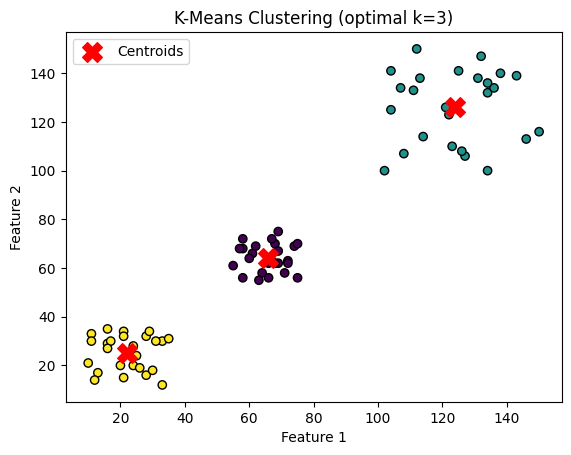

In [5]:
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (optimal k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
